In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Importing The Dataset
import os
current_path = os.getcwd()
print("Current Path:", current_path)
dataset= pd.read_csv(current_path+'/Dataset/StudentInfo.csv')
X = dataset.iloc[:, 0:32]
X2 = dataset.iloc[:, 0:32]
y = dataset.iloc[:, 32]

Current Path: /Users/chendrakanth/Library/Mobile Documents/com~apple~CloudDocs/Chandu/Projects/My-Projects/Hackathon/ERROR404


In [3]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


In [4]:
# Encoding Categorical Data
labelEncoder_X = LabelEncoder()

variables_to_labelEncode = [0, 1, 3, 4, 5, 8, 9 ,10 , 11, 15, 16, 17, 18, 19, 20, 21, 22]

for i in variables_to_labelEncode:
    X.iloc[:, i] = labelEncoder_X.fit_transform(X.iloc[:, i])

In [5]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10


In [6]:
print(X['Mjob'].unique())
print(X['Fjob'].unique())
print(X['reason'].unique())
print(X['guardian'].unique())

[0 1 2 3 4]
[4 2 3 1 0]
[0 2 1 3]
[1 0 2]


In [7]:
y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [8]:
# One Hot Encoding
oneHotEncoder_X = OneHotEncoder(sparse = False)

X['Mjob_at_home'] = oneHotEncoder_X.fit_transform(X[['Mjob']])[:, 0]
X['Mjob_health'] = oneHotEncoder_X.fit_transform(X[['Mjob']])[:, 1]
X['Mjob_other'] = oneHotEncoder_X.fit_transform(X[['Mjob']])[:, 2]
X['Mjob_services'] = oneHotEncoder_X.fit_transform(X[['Mjob']])[:, 3]
X['Mjob_teacher'] = oneHotEncoder_X.fit_transform(X[['Mjob']])[:, 4]

X['Fjob_at_home'] = oneHotEncoder_X.fit_transform(X[['Fjob']])[:, 0]
X['Fjob_health'] = oneHotEncoder_X.fit_transform(X[['Fjob']])[:, 1]
X['Fjob_other'] = oneHotEncoder_X.fit_transform(X[['Fjob']])[:, 2]
X['Fjob_services'] = oneHotEncoder_X.fit_transform(X[['Fjob']])[:, 3]
X['Fjob_teacher'] = oneHotEncoder_X.fit_transform(X[['Fjob']])[:, 4]

X['reason_course'] = oneHotEncoder_X.fit_transform(X[['reason']])[:, 0]
X['reason_other'] = oneHotEncoder_X.fit_transform(X[['reason']])[:, 1]
X['reason_home'] = oneHotEncoder_X.fit_transform(X[['reason']])[:, 2]
X['reason_reputation'] = oneHotEncoder_X.fit_transform(X[['reason']])[:, 3]

X['guardian_father'] = oneHotEncoder_X.fit_transform(X[['guardian']])[:, 0]
X['guardian_mother'] = oneHotEncoder_X.fit_transform(X[['guardian']])[:, 1]
X['guardian_other'] = oneHotEncoder_X.fit_transform(X[['guardian']])[:, 2]

/Users/chendrakanth/.local/share/virtualenvs/ERROR404-TD4UYz4g/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/chendrakanth/.local/share/virtualenvs/ERROR404-TD4UYz4g/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/chendrakanth/.local/share/virtualenvs/ERROR404-TD4UYz4g/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/chendrakanth/.local/share/virt

In [9]:
# Drop old columns
X.drop(['Mjob', 'Fjob', 'reason', 'guardian'],axis='columns', inplace=True)

# Reorder columns
X = X[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 
      'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
      'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
      'reason_course', 'reason_other', 'reason_home', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other','traveltime', 'studytime', 'failures', 'schoolsup', 
       'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']]

In [10]:
len(X.columns)

45

In [11]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob_at_home,Mjob_health,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,1.0,0.0,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,1.0,0.0,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,1.0,0.0,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,0.0,1.0,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,0.0,0.0,...,0,4,3,2,1,2,5,4,6,10


In [12]:
# Dimensionality Reduction
variance_vector = X.var()

correlation_matrix = X.corr()

In [13]:
correlation_matrix

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob_at_home,Mjob_health,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
school,1.000000,-0.065217,0.242588,-0.234020,0.043369,-0.012238,-0.179277,-0.161295,0.118713,-0.056664,...,0.090014,-0.033159,-0.020403,0.045671,0.060405,0.034115,-0.031234,-0.174442,-0.081769,-0.038725
sex,-0.065217,1.000000,-0.038832,0.011556,0.094361,0.051337,0.109387,0.070786,-0.144979,0.017382,...,-0.108944,0.074725,0.181603,0.062530,0.275928,0.302623,0.141113,-0.013076,-0.025122,-0.025024
age,0.242588,-0.038832,1.000000,-0.071257,0.013290,0.006887,-0.130196,-0.138521,0.089702,-0.093470,...,0.173800,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475
address,-0.234020,0.011556,-0.071257,1.000000,0.054484,-0.074097,0.179720,0.124303,-0.166054,0.090991,...,-0.021209,-0.016801,-0.009744,0.030790,-0.064030,-0.043391,-0.010895,0.036696,0.113113,0.127793
famsize,0.043369,0.094361,0.013290,0.054484,1.000000,-0.207302,-0.025556,-0.047290,-0.004664,0.007552,...,-0.007656,-0.005328,-0.007249,0.005889,0.075646,0.090019,-0.009147,0.018284,0.057610,0.057469
Pstatus,-0.012238,0.051337,0.006887,-0.074097,-0.207302,1.000000,-0.077133,-0.049156,0.049887,0.016727,...,-0.050021,0.042448,0.038714,0.020498,0.015777,0.047575,0.016213,-0.113955,-0.000155,-0.010219
Medu,-0.179277,0.109387,-0.130196,0.179720,-0.025556,-0.077133,1.000000,0.642063,-0.387814,0.258135,...,-0.008685,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662
Fedu,-0.161295,0.070786,-0.138521,0.124303,-0.047290,-0.049156,0.642063,1.000000,-0.188731,0.133393,...,-0.039906,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634
Mjob_at_home,0.118713,-0.144979,0.089702,-0.166054,-0.004664,0.049887,-0.387814,-0.188731,1.000000,-0.139480,...,0.036321,-0.017289,-0.047825,-0.036958,-0.015903,-0.000364,-0.078445,-0.040215,-0.121758,-0.123565
Mjob_health,-0.056664,0.017382,-0.093470,0.090991,0.007552,0.016727,0.258135,0.133393,-0.139480,1.000000,...,0.021277,-0.040978,-0.015520,0.046969,-0.076301,0.024039,0.036168,-0.061755,0.108038,0.113655


In [14]:
variance_vector

school                1.007096
sex                   0.245867
age                   1.537537
address               0.198656
famsize               0.207392
Pstatus               0.102566
Medu                  1.265415
Fedu                  1.209864
Mjob_at_home          0.151438
Mjob_health           0.072444
Mjob_other            0.236346
Mjob_services         0.176689
Mjob_teacher           0.10912
Fjob_at_home          0.055914
Fjob_health           0.037766
Fjob_other            0.246709
Fjob_services         0.201658
Fjob_teacher           0.05844
reason_course         0.242467
reason_other          0.186233
reason_home           0.092836
reason_reputation     0.181293
guardian_father       0.178753
guardian_mother       0.211268
guardian_other        0.065096
traveltime            0.535425
studytime             0.696145
failures              0.430522
schoolsup             0.101089
famsup                0.237452
paid                  0.166481
activities            0.250207
nursery 

#### G1 and G2 => Drop them

In [15]:
X.drop(['Medu', 'Walc', 'G1', 'G2'],axis='columns', inplace=True)
len(X.columns)

41

In [16]:
# # Using Random Forest Feature importance to select the most important features
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(random_state=1, max_depth=10)

# model.fit(X,y)

# features = X.columns
# importances = model.feature_importances_
# indices = np.argsort(importances)[-1:-12:-1]

# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

# X = X.iloc[:, indices]

In [16]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:

X_train.head()

,school,sex,age,address,famsize,Pstatus,Fedu,Mjob_at_home,Mjob_health,Mjob_other,...,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences
666,1,0,17,1,0,1,4,0.0,0.0,0.0,...,1,1,1,1,5,3,1,1,5,2
479,1,0,15,1,0,1,1,0.0,0.0,1.0,...,0,1,1,0,4,3,2,2,4,2
933,3,0,16,0,1,1,2,0.0,0.0,1.0,...,0,1,0,1,4,3,3,2,5,2
1016,3,0,17,0,0,1,2,0.0,0.0,1.0,...,0,1,0,0,3,2,2,1,3,0
762,1,0,17,1,1,1,1,0.0,0.0,1.0,...,1,1,1,0,4,2,3,2,2,2


In [18]:
y_train.head()

666     12
479     12
933     11
1016    13
762     14
Name: G3, dtype: int64

In [19]:

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train = np.array(y_train).reshape(-1, 1)
y_train = y_scaler.fit_transform(y_train)

<BarContainer object of 11 artists>

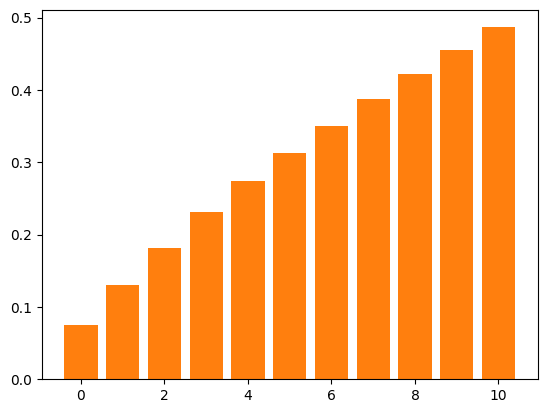

In [20]:
# Using Principal Component Analysis to extract the most important features

from sklearn.decomposition import PCA

pca = PCA(n_components=11)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.bar(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))

In [21]:
# Train a Support Vector Regression (WITH RBF Kernel) model on the preprocessed data
from sklearn.metrics import mean_squared_error
from sklearn import svm
svr = svm.SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
y_pred_svr = y_scaler.inverse_transform(y_pred_svr.reshape(-1, 1))
rmse_svm = mean_squared_error(y_test, y_pred_svr, squared=False)
print(rmse_svm)

3.6384028095872427


/Users/chendrakanth/.local/share/virtualenvs/ERROR404-TD4UYz4g/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### with PCA (21 most important components): RMSE = 3.3329384760474756
#### with PCA (11 most important components): RMSE = 3.5444053029175144
#### with PCA (8 most important components): RMSE = 3.5961118065499114
#### RF Feature Importance with 11 features : RMSE = 3.721869817793533
#### (feature selection based on multicollinearity and random forest feature importance)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr = y_scaler.inverse_transform(y_pred_lr)

rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
print(rmse_lr)

3.6789813717814237


#### with PCA (21 most important components): RMSE = 3.431214962514669
#### with PCA (11 most important components): RMSE = 3.647322748093764
#### with PCA (8 most important components): RMSE = 3.5673982753825433
#### with 11 features  and : RMSE = 3.8665098821071684
#### (feature selection based on multicollinearity and random forest feature importance)

In [25]:
svr = svm.SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
y_pred_svr = y_scaler.inverse_transform(y_pred_svr.reshape(-1, 1))
rmse_svm = mean_squared_error(y_test, y_pred_svr, squared=False)
print(rmse_svm)

3.6651709634203082


/Users/chendrakanth/.local/share/virtualenvs/ERROR404-TD4UYz4g/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


############################## CONCLUSIONS ###################################

##### well after analysing the obtained results we can conclude that the SVR outperform the linear regression model in all cases maybe that's because SVR works better in larger datasets or maybe just because including some features which seemed unimportant gives a non-linearity advantage to the SVR over the LR model. 
##### But the LR model for sure outperform the SVR when fitting a small number of features because maybe at some point this problem becomes simple enough so that it doesn't need a non-linear model or it could be just because SVR works better 

##### Another important point to mention is that dimensionality reduction comes at a cost.
##### We tried with different number of components such as 21,11,8. 21 and 11 doesnot have much difference when its MSE are compared. And as the components are decreased after 11, the RMSE is increasing. So we choose 11 as the n_components in PCA

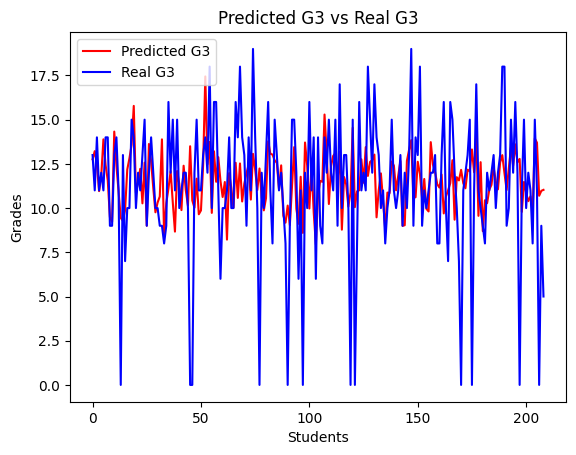

In [26]:
plt.plot(range(len(y_pred_svr)), y_pred_svr, color='red', label='Predicted G3')
plt.plot(range(len(y_test)), y_test, color='blue', label='Real G3')
plt.title('Predicted G3 vs Real G3')
plt.xlabel('Students')
plt.ylabel('Grades')
plt.legend()  # This adds the legend based on the 'label' parameter in plt.plot
plt.show()
